In [1]:
# Implementation - vectorization

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

print(type(areas))
print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

<class 'numpy.ndarray'>
areas:  [6.7 4.6 3.5 5.5]
prices:  [9.1 5.9 4.6 6.7]
data_size:  4


<Figure size 640x480 with 1 Axes>

In [2]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# forward
def predict(x,theta):
    return x.dot(theta)

# compute gradient
def gradient(z,y,x):
    dtheta = x*(z-y)/np.abs(z-y)
    
    return dtheta

# update weights
def update_weight(theta,n,dtheta):
    dtheta_new = theta - n*dtheta
    
    return dtheta_new

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

# init weight
n = 0.01
theta = np.array([-0.34, 0.04]) #[w, b]

# how long
epoch_max = 10

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(data_size):
        # get a sample
        x = data[i]
        y = prices[i:i+1]

        # predict z
        z = predict(x, theta)

        # compute loss
        loss = abs(z-y)
        losses.append(loss[0])

        # compute gradient
        dtheta = gradient(z,y,x)

        # update weights
        theta = update_weight(theta,n,dtheta)

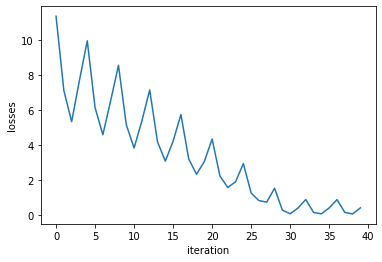

In [3]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()